<a href="https://colab.research.google.com/github/aayushbhardwaj317/Building-a-Better-Contact-Sheet/blob/master/Dia_of_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

***Position of sensors in Real world frame of reference***

In [ ]:
sensor_P=5
sensor_Q=5
sensor_R=5
sensor_S=5

***Frame dimension***

In [ ]:
Length=10
Breadth=10

***Sensor measured values***

In [ ]:
N=int(input('Enter the total set of values'))
L=[]
for i in range(0,N):
  a=input("Enter Values of alpha ")
  a = list(float(x) for x in a.split(","))
  b=input("Enter Values of beta ")
  b = list(float(x) for x in b.split(","))
  d=input("Enter Values of delta ")
  d = list(float(x) for x in d.split(","))
  y=input("Enter Values of gamma ")
  y = list(float(x) for x in y.split(","))
  L.append([a,b,d,y])
print(L)

Enter the total set of values1
Enter Values of alpha 2,0
Enter Values of beta 2,0
Enter Values of delta 2,0
Enter Values of gamma 2,0
[[[2.0, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.0]]]


In [ ]:
for i in range(0,N):
  L[i][0][1]=L[i][0][0]
  L[i][0][0]=sensor_P
  L[i][1][0]=Length-L[i][1][0]
  L[i][1][1]=sensor_Q
  L[i][2][1]=Breadth-L[i][2][0]
  L[i][2][0]=sensor_R
  L[i][3][0]=L[i][3][0]
  L[i][3][1]=sensor_S


In [ ]:
print("Incident beam position",L)

Incident beam position [[[5, 2.0], [8.0, 5], [5, 8.0], [2.0, 5]]]


In [ ]:
def D1(abdy):
   LL,DL=[],[]
   x1,y1=abdy[0][0],abdy[0][1]
   x2,y2=abdy[1][0],abdy[1][1]
   x3,y3=abdy[2][0],abdy[2][1]
   A=np.array([[2*x1,2*y1,1],[2*x2,2*y2,1],[2*x3,2*y3,1]])
   B=np.array([[-(x1**2)-(y1**2)],[-(x2**2)-(y2**2)],[-(x3**2)-(y3**2)]])
   invA=np.linalg.inv(A)
   X=np.matmul(invA,B)
   g,f,c=X[0],X[1],X[2]
   dia=2*((g**2 + f**2 -c)**0.5)
   x,y=abdy[3][0],abdy[3][1]
   if (x**2 + y**2 + 2*g*x + 2*f*y + c)>=0:
     offset=1
   else:
     offset=-1
   return dia,offset,g,f
def D2(abdy):
  LL,DL=[],[]
  x1,y1=abdy[1][0],abdy[1][1]
  x2,y2=abdy[2][0],abdy[2][1]
  x3,y3=abdy[3][0],abdy[3][1]
  A=np.array([[2*x1,2*y1,1],[2*x2,2*y2,1],[2*x3,2*y3,1]])
  B=np.array([[-(x1**2)-(y1**2)],[-(x2**2)-(y2**2)],[-(x3**2)-(y3**2)]])
  invA=np.linalg.inv(A)
  X=np.matmul(invA,B)
  g,f,c=X[0],X[1],X[2]
  dia=2*((g**2 + f**2 -c)**0.5)
  x,y=abdy[0][0],abdy[0][1]
  if (x**2 + y**2 + 2*g*x + 2*f*y + c)>=0:
    offset=1
  else:
    offset=-1
  return dia,offset,g,f
def D3(abdy):
  LL,DL=[],[]
  x1,y1=abdy[2][0],abdy[2][1]
  x2,y2=abdy[3][0],abdy[3][1]
  x3,y3=abdy[0][0],abdy[0][1]
  A=np.array([[2*x1,2*y1,1],[2*x2,2*y2,1],[2*x3,2*y3,1]])
  B=np.array([[-(x1**2)-(y1**2)],[-(x2**2)-(y2**2)],[-(x3**2)-(y3**2)]])
  invA=np.linalg.inv(A)
  X=np.matmul(invA,B)
  g,f,c=X[0],X[1],X[2]
  dia=2*((g**2 + f**2 -c)**0.5)
  x,y=abdy[1][0],abdy[1][1]
  if (x**2 + y**2 + 2*g*x + 2*f*y + c)>=0:
    offset=1
  else:
    offset=-1
  return dia,offset,g,f
def D4(abdy):
  LL,DL=[],[]
  x1,y1=abdy[3][0],abdy[3][1]
  x2,y2=abdy[0][0],abdy[0][1]
  x3,y3=abdy[1][0],abdy[1][1]
  A=np.array([[2*x1,2*y1,1],[2*x2,2*y2,1],[2*x3,2*y3,1]])
  B=np.array([[-(x1**2)-(y1**2)],[-(x2**2)-(y2**2)],[-(x3**2)-(y3**2)]])
  invA=np.linalg.inv(A)
  X=np.matmul(invA,B)
  g,f,c=X[0],X[1],X[2]
  dia=2*((g**2 + f**2 -c)**0.5)
  x,y=abdy[2][0],abdy[2][1]
  if (x**2 + y**2 + 2*g*x + 2*f*y + c)>=0:
    offset=1
  else:
    offset=-1
  return dia,offset,g,f

In [ ]:
DIA=[]
LAM=[]
OFF=[]
x_center=[]
y_center=[]
for i in range(0,len(L)):
  d1,off1,x1,y1=D1(L[i])[0],D1(L[i])[1],D1(L[i])[2],D1(L[i])[3]
  d2,off2,x2,y2=D2(L[i])[0],D2(L[i])[1],D2(L[i])[2],D2(L[i])[3]
  d3,off3,x3,y3=D3(L[i])[0],D3(L[i])[1],D3(L[i])[2],D3(L[i])[3]
  d4,off4,x4,y4=D4(L[i])[0],D4(L[i])[1],D4(L[i])[2],D4(L[i])[3]
  DIA.append(list(d1))
  DIA.append(list(d2))
  DIA.append(list(d3))
  DIA.append(list(d4))
  OFF.append(off1)
  OFF.append(off2)
  OFF.append(off3)
  OFF.append(off4)
  x_center.append(list(-x1))
  x_center.append(list(-x2))
  x_center.append(list(-x3))
  x_center.append(list(-x4))
  y_center.append(list(-y1))
  y_center.append(list(-y2))
  y_center.append(list(-y3))
  y_center.append(list(-y4))
  LAM.append(L[i][3])
  LAM.append(L[i][0])
  LAM.append(L[i][1])
  LAM.append(L[i][2])
#

In [ ]:
DIA

[[6.000000000000004],
 [6.000000000000004],
 [6.000000000000004],
 [6.000000000000003]]

In [ ]:
LAM

[[2.0, 5], [5, 2.0], [8.0, 5], [5, 8.0]]

In [ ]:
OFF

[1, -1, -1, -1]

In [ ]:
x_center

[[5.0000000000000036], [5.0], [5.000000000000003], [5.000000000000002]]

In [ ]:
y_center

[[5.0], [5.0], [5.0], [5.0]]

In [ ]:
arrx = np.array(x_center)
arry = np.array(y_center)

lisx = arrx.tolist()
lisy = arry.tolist()
cex = lisx[1]
cey = lisy[1]
valcex = cex[0]
valcey = cey[0]
print(valcey)

5.0


In [ ]:
def lamb_dist(x,y,lambd,d):
  dist=abs((((x-lambd[0])**2 + (y-lambd[1])**2) ** 0.5) - (d/2))
  return dist

In [ ]:
for i in range(0,len(OFF)):
  dis=lamb_dist(x_center[i][0],y_center[i][0],LAM[i],DIA[i][0])
  if OFF[i]==1:
    DIA[i][0]=DIA[i][0]+dis
  else:
    DIA[i][0]=DIA[i][0]-dis


In [ ]:
DIA

[[6.000000000000006],
 [6.000000000000001],
 [5.999999999999997],
 [6.000000000000001]]

# Gaussian Distribution

In [ ]:
from scipy.stats import norm
import statistics

In [ ]:
x_axis=[]
for i in range(0,len(DIA)):
  x_axis.append(DIA[i][0])

In [ ]:
mu = statistics.mean(x_axis) 
sigma = statistics.stdev(x_axis)
x1 = min(x_axis)
x2 = max(x_axis)

In [ ]:
# calculate the z-transform
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

In [ ]:
x = np.arange(z1, z2, 0.001) # range of x in spec
x_all = np.arange(-10, 10, 0.001) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

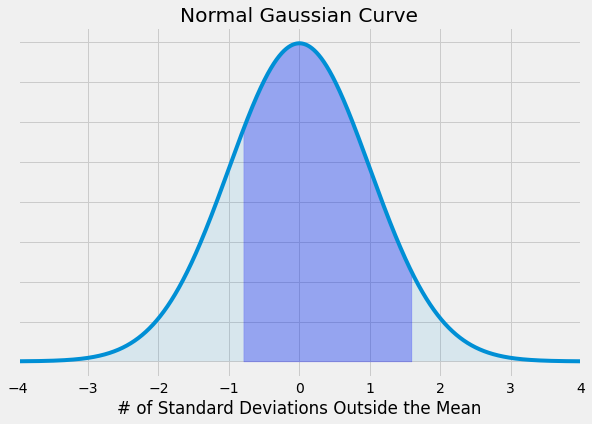

In [ ]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')

plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

In [ ]:
sigma

2.235200005905454e-15

In [ ]:
format_float = "{:.2f}".format(mu)
print("Final diameter is ",format_float)

Final diameter is  6.00
